# Rate Law
[<!-- module-cfg badge --><span class="module module-cfg">Chemistry for Geoscientists</span>](module-cfg) [<!-- module-ltg badge --><span class="module module-ltg">Low-Temperature Geochemistry</span>](module-ltg) 
```{index} Rate Law
```

Rate law is an expression of the empirical dependence of the rate of reaction on the concentrations of the reactants.

Consider the following chemical equation:

$$v_{A}A+v_{B}B=P$$

So, the rate ($R$) of the reaction can be written as:

$$R = \frac{d[P]}{dt} = -\frac{1}{v_A}\frac{d[A]}{dt} = -\frac{1}{v_B}\frac{d[B]}{dt} = k\cdot[A]^{n_A}\cdot[B]^{n_B}$$

where

   * $k$ = experimentally determined **rate constant** (sometimes also called “specific rate constant”)
   * $n_A$, $n_B$, ... are real numbers (can be fractions, or zero) that denote the “order of the reaction” <u>with respect to</u> species A, B, C, D,…
   * $n_{overall}=n_A+n_B+...$ is the <u>overall order</u> of the reaction
   * "order $n_i$" not typically the same as stoichiometry ($v_i$) BUT IT CAN BE for elementary reactions, if mechanism is known (number of individual atoms/molecules involved in the reaction)
   
To make everything simple, we will conider reactions with only one reactant, but different orders.

$$A \longrightarrow products$$

## First-order reaction

For a first-order reaction, the reaction rate ($R$) is directly proportional to the concentration of the reactant, i.e.

$$R = -\frac{d[A]}{dt} = k[A]$$

Rearranging the rate law, we get

$$\frac{1}{[A]}d[A] = -k\,dt$$

Integrating it, we get

$$\int_{[A]_0}^{[A]}\frac{1}{[A]}d[A] = \int_{0}^{t}-k\,dt$$

$$[\ln[A]]_{[A]_0}^{[A]} = -k[t]_0^t$$

$$\ln[A]-\ln[A]_0 = -k(t-0)$$

$$\therefore \ln[A] = -kt+\ln[A]_0 \quad or \quad [A] = [A]_0\exp(-kt)$$

So, we can plot a linear relationship between $\ln[A]$ and $t$, with slope = $-k$ and y-intercept = $\ln[A]_0$.

Finding t when $[A]=\frac{[A]_0}{2}$.

$$\ln\left(\frac{[A]_0}{2}\right) = -kt+\ln[A]_0$$

$$kt = \ln[A]_0 - \ln\left(\frac{[A]_0}{2}\right)$$

$$kt = \ln\left(\frac{[A]_0}{\left(\frac{[A]_0}{2}\right)}\right)$$

$$\therefore t = t_{\frac{1}{2}} =\frac{\ln2}{k}$$

The time the concentration of a reactant takes to reach half it’s starting value is called "half-life ($t_{\frac{1}{2}}$)". It can be seen that, for first-order reactions, the length of half-life is independent of the concentration of a reactant.

In [43]:
# import relevant modules

%matplotlib inline
from math import e
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [85]:
# create our own functions

def dont_show_scale(ax, axis):
    if axis == 'x':
        ax.set_xticks([])
        ax.set_xticklabels([])
    elif axis == 'y':
        ax.set_yticks([])
        ax.set_yticklabels([])
    return ax

def simple_title_and_label(ax, x_name, y_name):
    ax.set_title(y_name + ' VS ' + x_name, fontsize=16)
    ax.set_xlabel(x_name, fontsize=14)
    ax.set_ylabel(y_name, fontsize=14)
    return ax

# define a function to mimic the empirical rate law (rate = k[A]^n)
def rate(A, k, n):
    return k*(A**n)

Text(0.4, 0.7, 'Slope = $-k$')

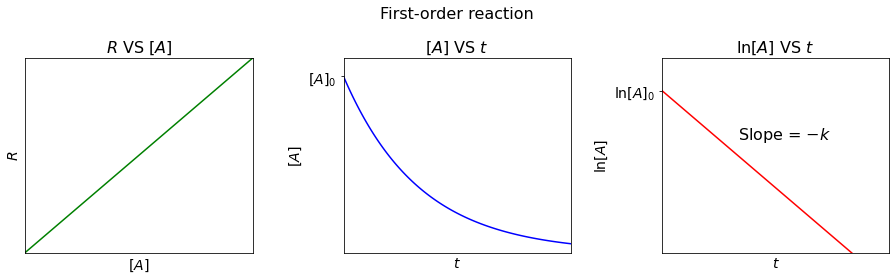

In [86]:
# set figures
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))
fig.suptitle("First-order reaction", fontsize=16)
plt.subplots_adjust(top=0.8,
                    left=-0.1,
                    right=1.1,
                    wspace=0.4, 
                    hspace=0.4)

k = 1  # rate constant
A0 = e  # [A]0

# define functions to mimic the integrated rate law
def integrated_A_1st_order(t, k, A0):
    return A0*(e**(-k*t))

def integrated_lnA_1st_order(t, k, A0):
    return np.log(integrated_A_1st_order(t, k, A0))

# plot Rate VS [A]
A = np.linspace(0, 1.2, 100)
ax1.plot(A, rate(A, k, 1), 'g')
ax1.set_xlim(0, 1.2)
ax1.set_ylim(0, 1.2)
simple_title_and_label(ax1, '$[A]$', '$R$')
dont_show_scale(ax1, 'x')
dont_show_scale(ax1, 'y')

# plot [A] VS t
t = np.linspace(0, 3, 100)
ax2.plot(t, integrated_A_1st_order(t, k, A0), 'b')
ax2.set_xlim(0, 3)
ax2.set_ylim(0, 3)
simple_title_and_label(ax2, '$t$', '$[A]$')
dont_show_scale(ax2, 'x')
ax2.set_yticks([A0])
ax2.set_yticklabels(['$[A]_0$'], fontsize=14)

# plot ln[A] VS t
t = np.linspace(0, 1.2, 100)
ax3.plot(t, integrated_lnA_1st_order(t, k, A0), 'r')
ax3.set_xlim(0, 1.2)
ax3.set_ylim(0, 1.2)
simple_title_and_label(ax3, '$t$', '$\ln[A]$')
dont_show_scale(ax3, 'x')
ax3.set_yticks([integrated_lnA_1st_order(0, k, A0)])
ax3.set_yticklabels(['$\ln[A]_0$'], fontsize=14)
ax3.text(0.4, 0.7, 'Slope = $-k$', fontsize=16)

## Second-order reaction

For a second-order reaction, the reaction rate ($R$) is directly proportional to the square of the concentration of the reactant, i.e.

$$R = -\frac{d[A]}{dt} = k[A]^2$$

Derived by the similar approach, the integrated rate law can be written as:

$$\frac{1}{[A]} = \frac{1}{[A]_0} + kt$$

So, we can plot a linear relationship between $\frac{1}{[A]}$ and $t$, with slope = $k$ and y-intercept = $\frac{1}{[A]_0}$.

And half-life ($t_{\frac{1}{2}}$) is:

$$t_{\frac{1}{2}} = \frac{1}{[A]_0k}$$

Contrast to first-order reactions, the half-life of a second-order reaction is dependent on the concentration of a reactant.

Text(0.5, 0.7, 'Slope = $k$')

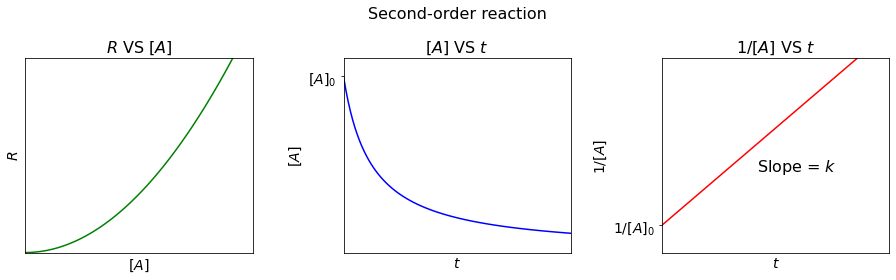

In [87]:
# set figures
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))
fig.suptitle("Second-order reaction", fontsize=16)
plt.subplots_adjust(top=0.8,
                    left=-0.1,
                    right=1.1,
                    wspace=0.4, 
                    hspace=0.4)

k = 1  # rate constant
A0 = e  # [A]0

# define functions to mimic the integrated rate law
def integrated_1_over_A_2nd_order(t, k, A0):
    return (1/A0)+k*t

def integrated_A_2nd_order(t, k, A0):
    return 1/integrated_1_over_A_2nd_order(t, k, A0)

# plot Rate VS [A]
A = np.linspace(0, 1.2, 100)
ax1.plot(A, rate(A, k, 2), 'g')
ax1.set_xlim(0, 1.2)
ax1.set_ylim(0, 1.2)
simple_title_and_label(ax1, '$[A]$', '$R$')
dont_show_scale(ax1, 'x')
dont_show_scale(ax1, 'y')

# plot [A] VS t
t = np.linspace(0, 3, 100)
ax2.plot(t, integrated_A_2nd_order(t, k, A0), 'b')
ax2.set_xlim(0, 3)
ax2.set_ylim(0, 3)
simple_title_and_label(ax2, '$t$', '$[A]$')
dont_show_scale(ax2, 'x')
ax2.set_yticks([A0])
ax2.set_yticklabels(['$[A]_0$'], fontsize=14)

# plot 1/[A] VS t
t = np.linspace(0, 1.2, 100)
ax3.plot(t, integrated_1_over_A_2nd_order(t, k, A0), 'r')
ax3.set_xlim(0, 1.2)
ax3.set_ylim(0.2, 1.4)
simple_title_and_label(ax3, '$t$', '$1/[A]$')
dont_show_scale(ax3, 'x')
ax3.set_yticks([integrated_1_over_A_2nd_order(0, k, A0)])
ax3.set_yticklabels(['$1/[A]_0$'], fontsize=14)
ax3.text(0.5, 0.7, 'Slope = $k$', fontsize=16)

## Zeroth-order reaction

For a zeroth-order reaction, the reaction rate ($R$) is constant over time, regardless of the concentration of reactants, i.e.

$$R = -\frac{d[A]}{dt} = k[A]^0 = k$$

Derived by the similar approach, the integrated rate law can be written as:

$$[A] = [A]_0 - kt$$

So, we can plot a linear relationship between $[A]$ and $t$, with slope = $-k$ and y-intercept = $[A]_0$.

And half-life ($t_{\frac{1}{2}}$) is:

$$t_{\frac{1}{2}} = \frac{[A]_0}{2k}$$

Text(1.3, 1.5, 'Slope = $-k$')

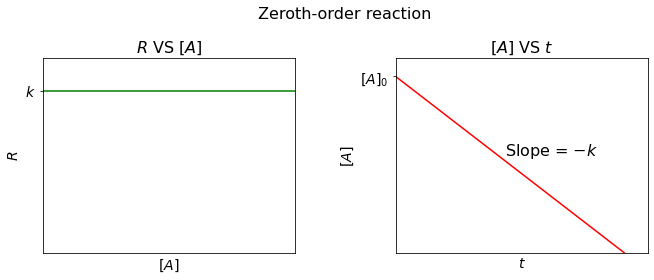

In [88]:
# set figures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 4))
fig.suptitle("Zeroth-order reaction", fontsize=16)
plt.subplots_adjust(top=0.8,
                    left=-0.1,
                    right=1.1,
                    wspace=0.4, 
                    hspace=0.4)

k = 1  # rate constant
A0 = e  # [A]0

# define a function to mimic the integrated rate law
def integrated_A_0th_order(t, k, A0):
    return A0-k*t

# plot Rate VS [A]
A = np.linspace(0, 1.2, 100)
ax1.plot(A, rate(A, k, 0), 'g')
ax1.set_xlim(0, 1.2)
ax1.set_ylim(0, 1.2)
simple_title_and_label(ax1, '$[A]$', '$R$')
dont_show_scale(ax1, 'x')
ax1.set_yticks([rate(0, k, 0)])
ax1.set_yticklabels(['$k$'], fontsize=14)

# plot [A] VS t
t = np.linspace(0, 3, 100)
ax2.plot(t, integrated_A_0th_order(t, k, A0), 'r')
ax2.set_xlim(0, 3)
ax2.set_ylim(0, 3)
simple_title_and_label(ax2, '$t$', '$[A]$')
dont_show_scale(ax2, 'x')
ax2.set_yticks([A0])
ax2.set_yticklabels(['$[A]_0$'], fontsize=14)
ax2.text(1.3, 1.5, 'Slope = $-k$', fontsize=16)

The plot below is created to compare the decrease of the concentration of a reactant over time for reactions with different orders.

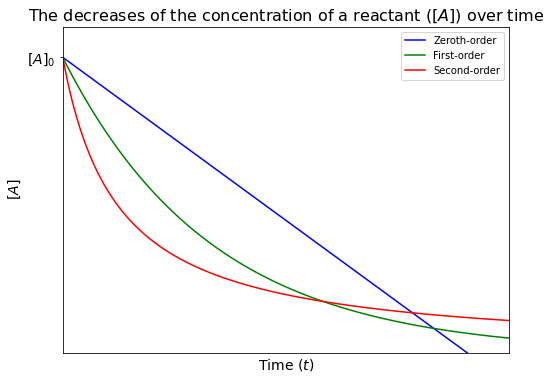

In [97]:
k = 1  # rate constant
A0 = e  # [A]0

# plot [A] VS t
plt.figure(figsize=(8,6))
t = np.linspace(0, 3, 100)
plt.plot(t, integrated_A_0th_order(t, k, A0), 'b', label='Zeroth-order')
plt.plot(t, integrated_A_1st_order(t, k, A0), 'g', label='First-order')
plt.plot(t, integrated_A_2nd_order(t, k, A0), 'r', label='Second-order')
plt.xlim([0, 3])
plt.ylim([0, 3])
plt.xticks([], [])
plt.yticks([A0], ['$[A]_0$'], fontsize=14)
plt.xlabel('Time $(t)$', fontsize=14)
plt.ylabel('$[A]$', fontsize=14)
plt.title('The decreases of the concentration of a reactant ($[A]$) over time', fontsize=16)
plt.legend(loc='best', fontsize=10)

## Lesson 6 - Problem 1

Use an empirical rate law to calculate the influence of $pH$ on reaction rate. (from N. Eby, example 2-7, p44)

At $pH>4$, the oxidation of $Fe^{2+}$ in solution can be expressed by the following net reaction

$$Fe^{2+} + \frac{1}{4}O_2 + \frac{5}{2}H_2O = Fe(OH)_3 + 2H^+$$

It turns out that the empirical rate law for the reaction is given by

$$\frac{d[Fe(II)]}{dt} = -\frac{k_+[Fe^{2+}]}{[H^+]^2}P_{O_2}$$

$k_+$ is the rate constant for the forward reaction. At $20^\circ C$, it is measured to be

$$k_+ = 1.2\cdot10^{-11}\,mol^2bar^{-1}d^{-1}$$

The partial pressure of oxygen in the atmosphere is about $P_{O_2}=0.2\,bar$.

Assuming that the concentration of $[Fe^{2+}]$ is measured and equals $10^{-3}\,mol\,L^{-1}$, calculate the reaction rate of the oxidation of $[Fe^{2+}]$ at $pH=5$ and $pH=7$. 

At $pH=5$, $[H^+]=10^{-5}\,M$

$$R = \frac{d[Fe(II)]}{dt} = -\frac{k_+[Fe^{2+}]}{[H^+]^2}P_{O_2} = -(1.2\cdot10^{-11})\cdot\frac{(10^{-3})}{(10^{-5})^2}\cdot(0.2) = -2.4\cdot10^{-5}\,\frac{mol}{L\cdot d}$$

At $pH=7$, $[H^+]=10^{-7}\,M$

$$R = \frac{d[Fe(II)]}{dt} = -\frac{k_+[Fe^{2+}]}{[H^+]^2}P_{O_2} = -(1.2\cdot10^{-11})\cdot\frac{(10^{-3})}{(10^{-7})^2}\cdot(0.2) = -2.4\cdot10^{-1}\,\frac{mol}{L\cdot d}$$

We can find the relationship between $pH$ and the reaction rate as both are related to $[H^+]$ as follows.

Recall the given empirical rate law:

$$R = \frac{d[Fe(II)]}{dt} = -\frac{k_+[Fe^{2+}]}{[H^+]^2}P_{O_2}$$

Gathering all the constants, we get:

$$R = -\frac{K}{[H^+]^2}$$

where $K = k_+[Fe^{2+}]\cdot P_{O_2}$ is a constant.

Since $pH = -\log[H^+]$, so:

$$R = -\frac{K}{10^{-2pH}}$$

From the relationship, it can be seen that increasing $pH$ for this reaction can affect the rate by orders of magnitude, as depicted in the plot below. Note that the <u>negative sign</u>, which means that $[Fe(II)]$ experiences a <u>decrease</u>, will be omitted.

Text(0.5, 1.0, 'The relationship between the reaction rate and pH')

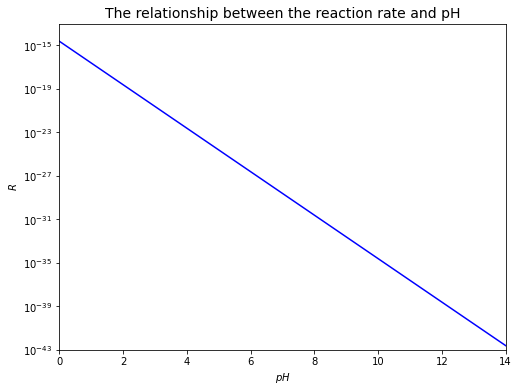

In [101]:
# Calculate the value of K
K = (1.2*10**-11) * (10**-3) * 0.2

# plot
plt.figure(figsize=(8,6))
pH = np.linspace(0, 14, 100)
plt.plot(pH, K/(10**(2*pH)), 'b')
plt.xlabel('$pH$')
plt.ylabel('$R$')
plt.xlim([0, 14])
plt.ylim([10**-43, 10**-13])
plt.yscale("log")
plt.title('The relationship between the reaction rate and pH', fontsize=14)

## References

- Lecture slide and practical for Lecture 6 of the Low-Temperature Geochemistry module